In [83]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import SimpleITK as sitk
from myshow import myshow, myshow3d

In [87]:
image_directory = os.path.join(".", "Images")
img = sitk.ReadImage(os.path.join(image_directory, "t009_N2DH_GOWT1.tif"))
myshow(img, "Original Image")

#the first settings below work better for resized images that are 3x smaller than the originals
#sigma, level = 0.00001, 10000
sigma, level = 0.00055, 1000

In [85]:
if sigma == 0.00001:
    img = sitk.VectorIndexSelectionCast(rgb_img,1)
    myshow(img, "Grayed Image")

In [77]:
feature_img = sitk.GradientMagnitudeRecursiveGaussian(img, sigma=sigma)
myshow(feature_img, "Edge Highlighted Image")

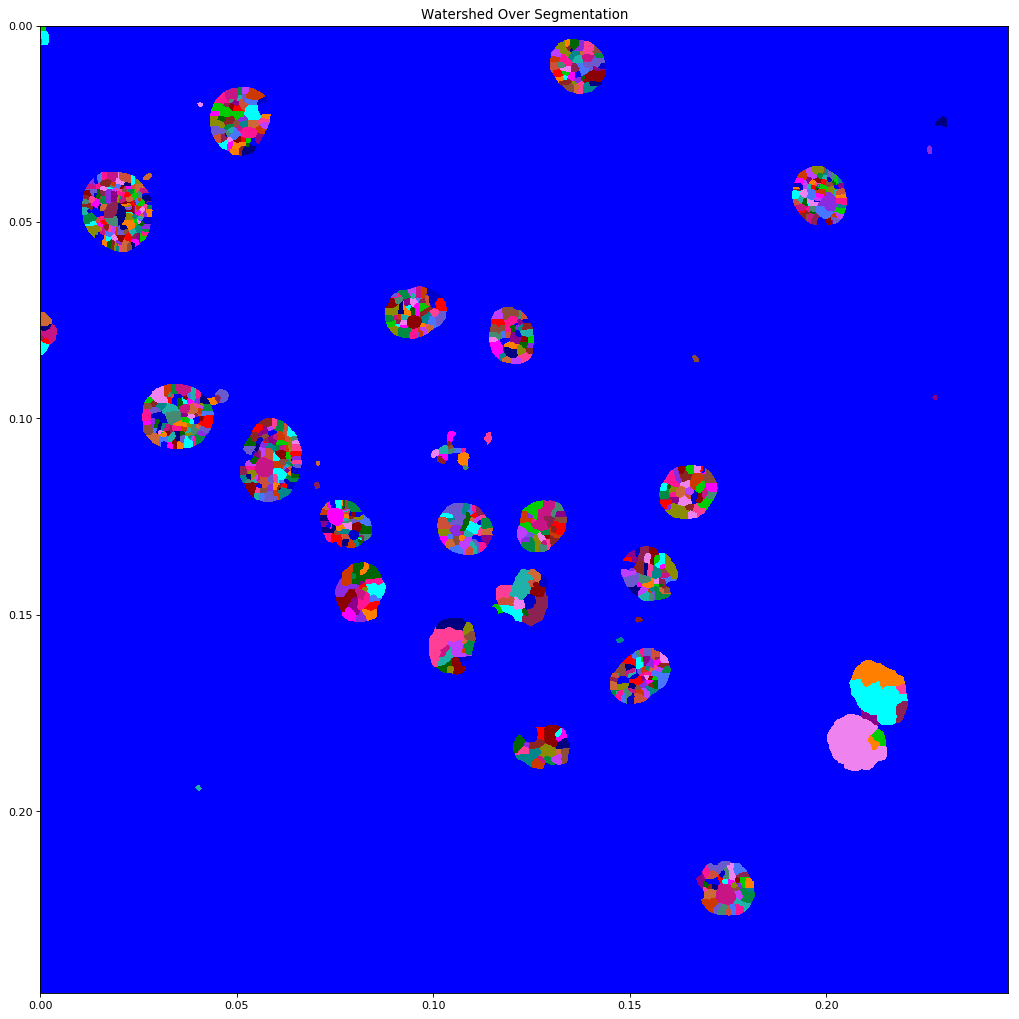

In [78]:
ws_img = sitk.MorphologicalWatershed(feature_img, level=level, markWatershedLine=False, fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Over Segmentation")

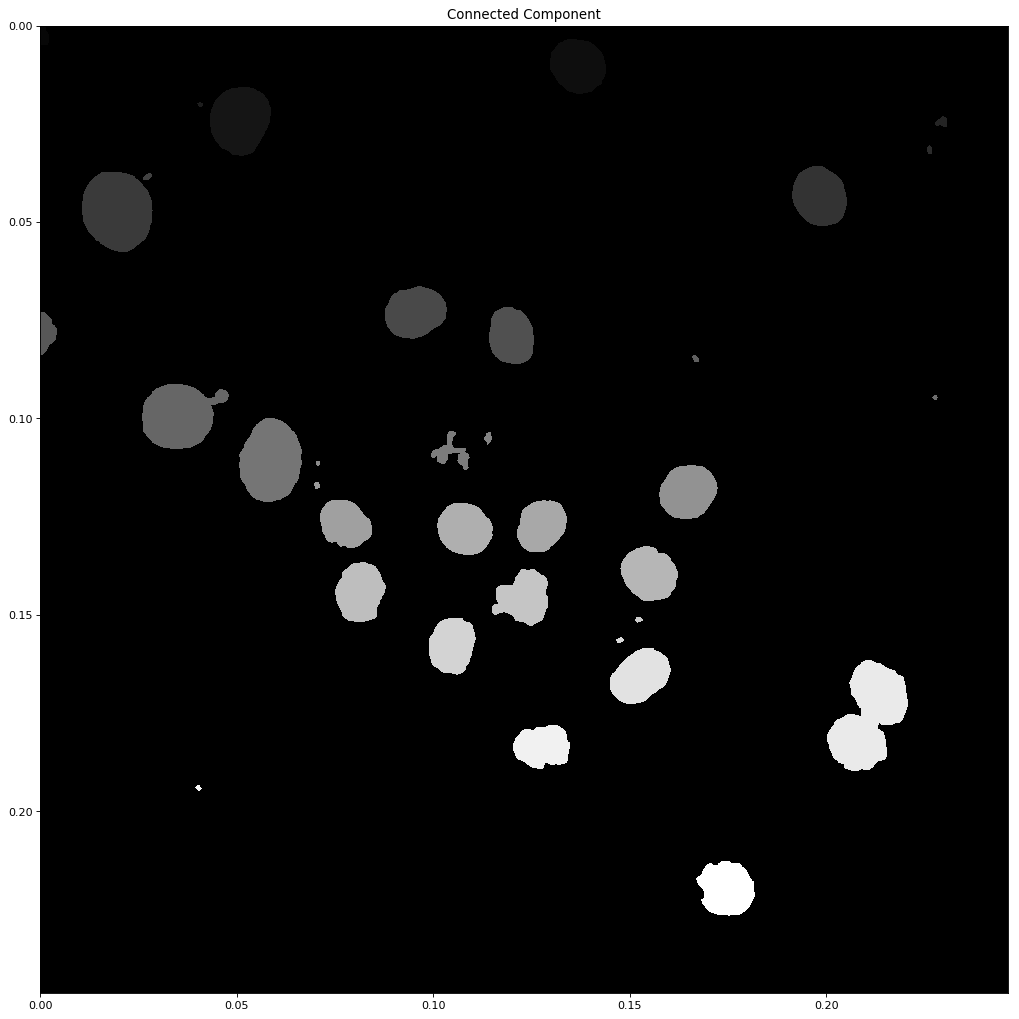

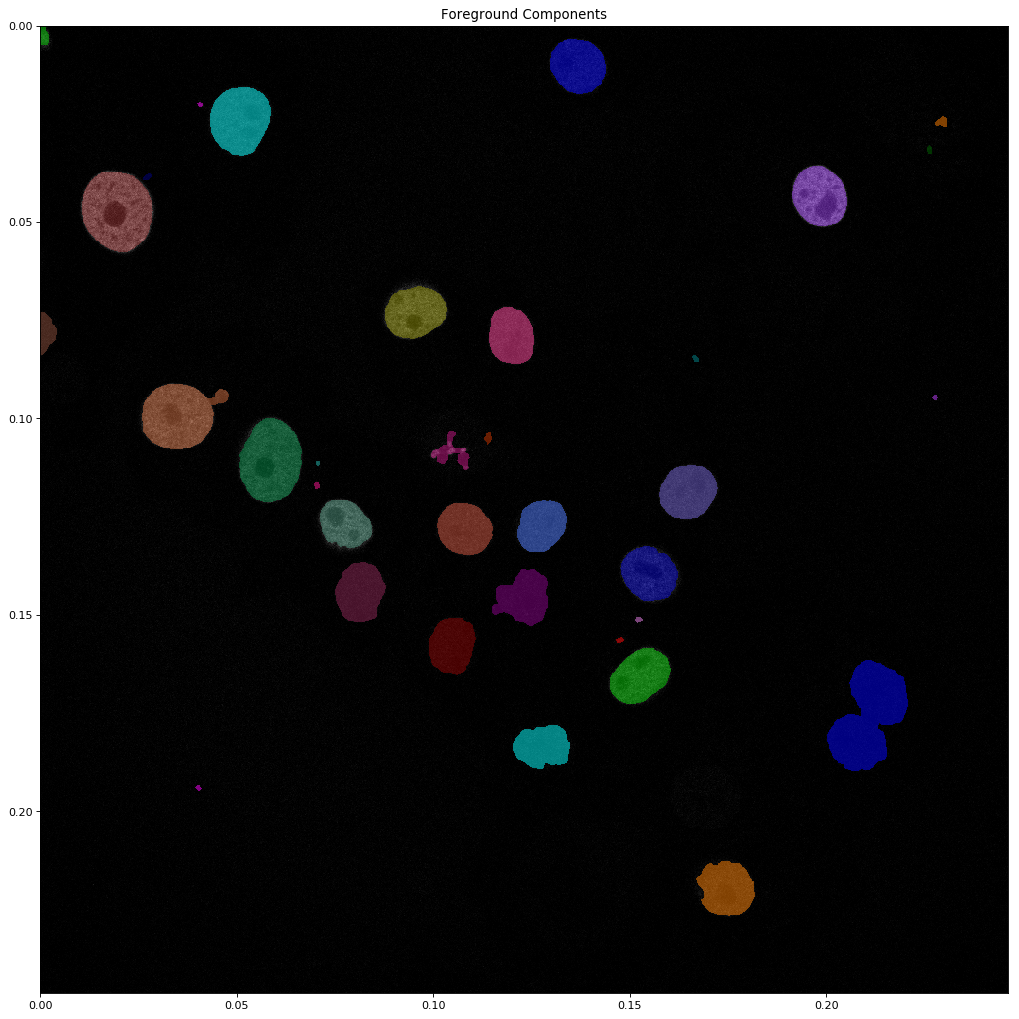

In [79]:
ws_size = np.shape(sitk.GetArrayFromImage(ws_img))
seg = sitk.ConnectedComponent(ws_img!=ws_img[ws_size[0] - 1, ws_size[1] - 1])
myshow(seg, "Connected Component")
myshow(sitk.LabelOverlay(img, seg), "Foreground Components")

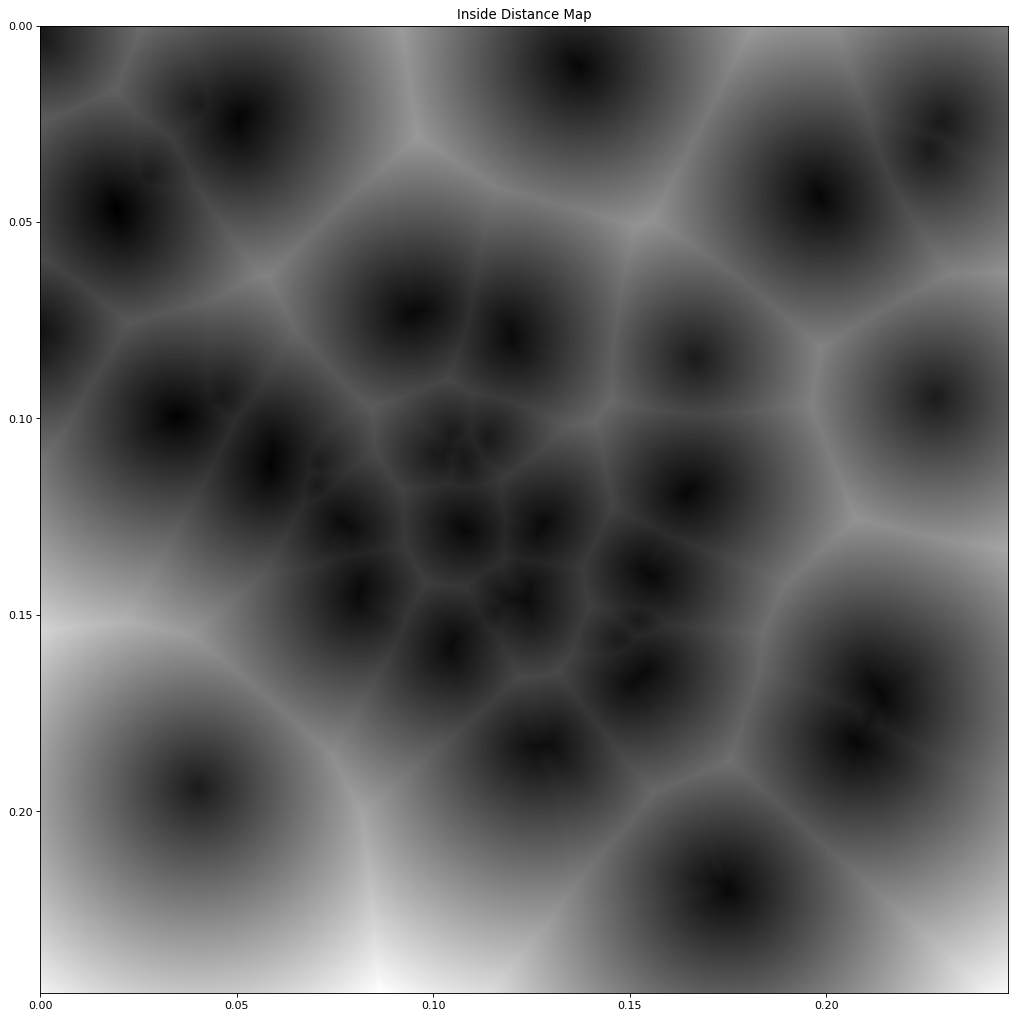

In [80]:
filled = sitk.BinaryFillhole(seg!=0)
d = sitk.SignedMaurerDistanceMap(filled, insideIsPositive=False, squaredDistance=False, useImageSpacing=False)
myshow(d, "Inside Distance Map")

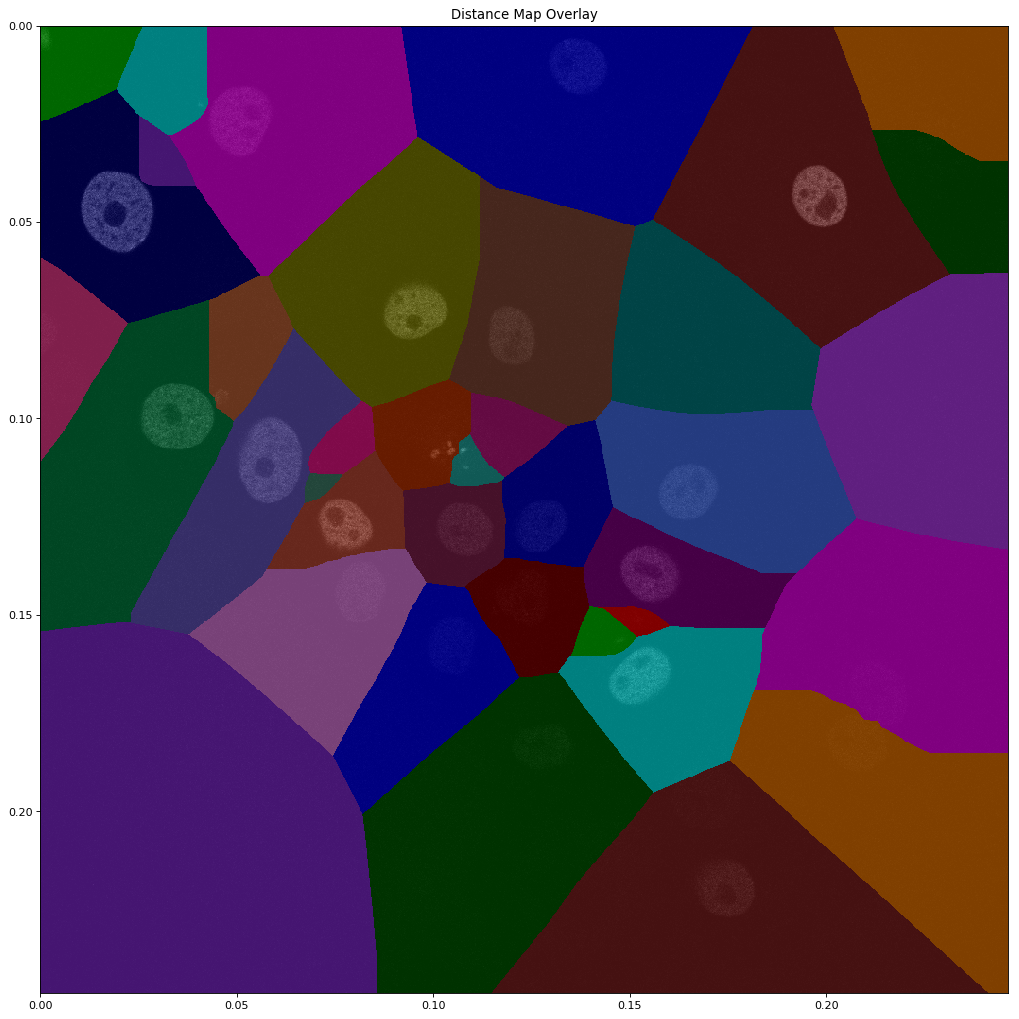

In [81]:
ws = sitk.MorphologicalWatershed( d, markWatershedLine=False, level=1)
myshow(sitk.LabelOverlay(img, ws), "Distance Map Overlay")

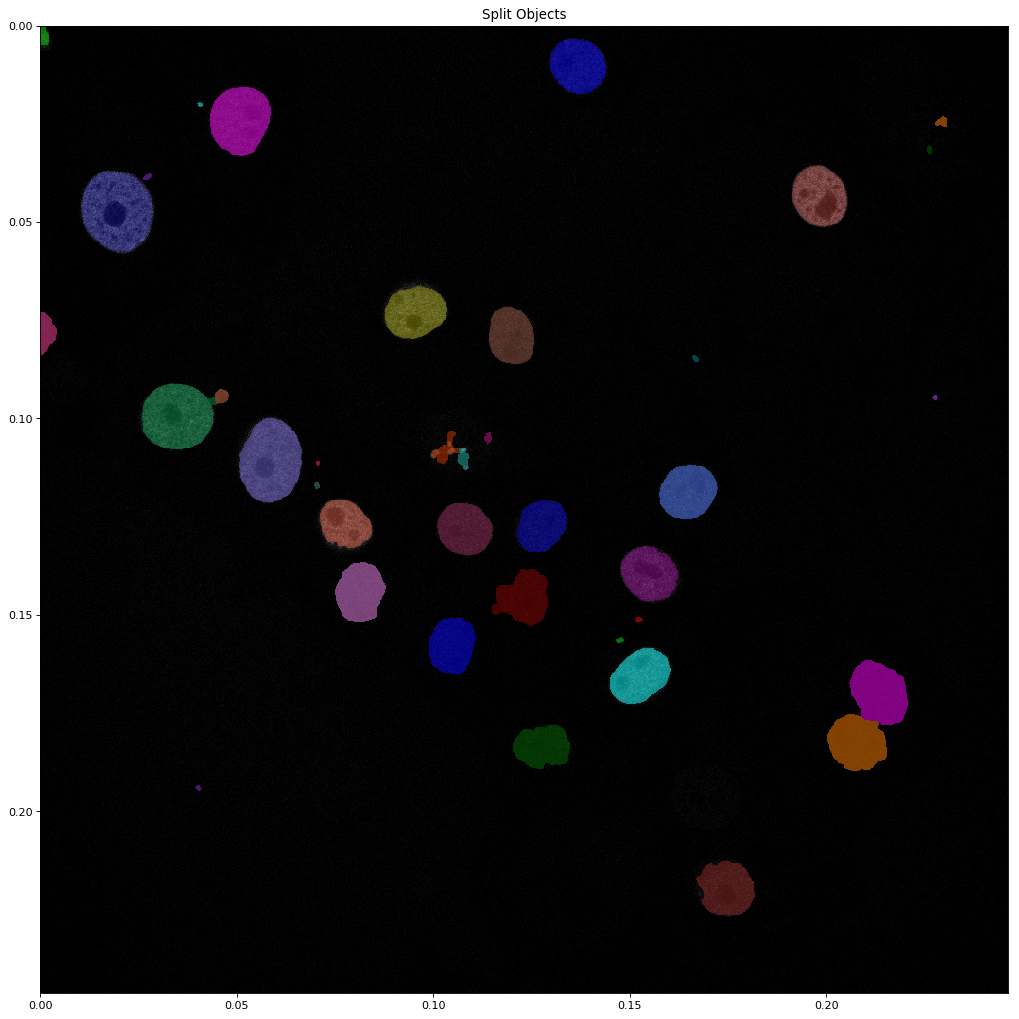

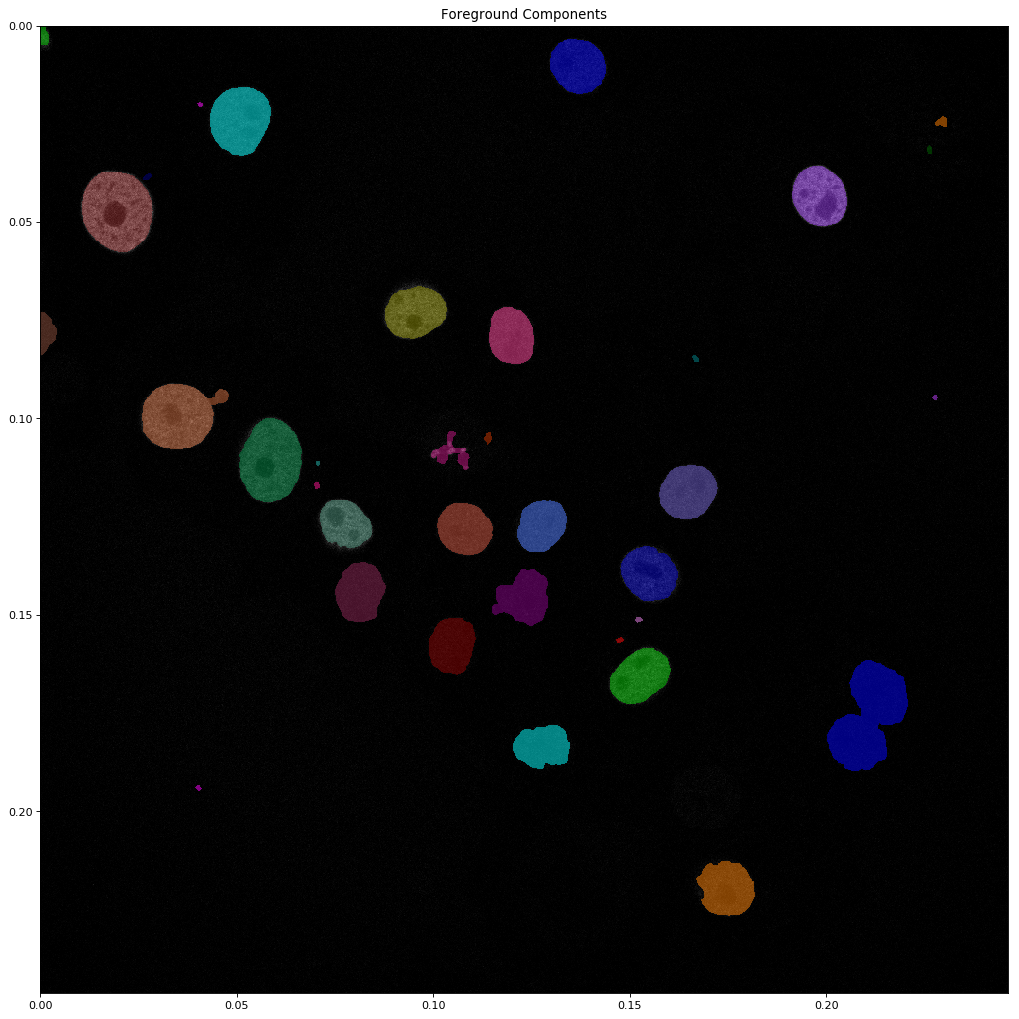

In [82]:
ws = sitk.Mask( ws, sitk.Cast(seg, ws.GetPixelID()))
myshow(sitk.LabelOverlay(img, ws), "Split Objects")
myshow(sitk.LabelOverlay(img, seg), "Foreground Components")